# Solution to Homework Problems

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE30338](https://github.com/jckantor/CBE30338).

All of the problems for this week's assignment have been consolidated into this notebook.  The purpose of this was to make it is easier to submit and grade assignments by keeping all of the parts in one place (this notebook) and available through one interface (Vocareum).  For questions that require no Python programming, simply type your results into a markdown cell. 

## 1. [5 pts] Semiconducter Heater (adapted from problem 5.2, SEMD) 

A heater for a semiconductor wafer has first-order dynamics that can be modeled by the differential equation

$$\tau \frac{dT}{dt} + (T-T_{amb}) =  KP(t)$$

where $\tau$ is time constant with units of minutes, and $K$ is a constant with units $^\circ C$ per kilowatt. $T_{ref}$ is an ambient temperature which has not been included in the report to you. The process is at steady state when an engineer changes the power input from 1.0 to 1.5 kilowatt. The engineer notes the following:

* The initial process temperature is 80$^\circ C$.
* The process temperature is 230$^\circ C$ four minutes after changing the power input.
* Thirty minutes later the temperture is 280$^\circ C$ where it remains as the new steady state.

**a.** What are the values of $\tau$ and $K$?

**b.** It is desired to put the model equation into standard state-space form

$$\frac{dx}{dt} = a\,x + b\,u$$ 

where $x$ corresponds to process temperature $T - T_{amb}$, and $u$ to process power. Express $a$ and $b$ algebraiclly in term of the $\tau$ and $K$, and find numerical values using the results of part (a).


### Solution

Write your answer in this and subsequent cells. This problem doesn't necessarily require Python coding, so feel free to simply edit and write your answer here if that meets your needs.

#### Part a. [3 pts]

Begin by considering the steady state relationship between $T$ and $P$,

$$T - T_{amb} = K P$$

Assuming the system is at steady state at $t=0$ and again at $t=30$. The initial and final conditions therefore provide two equations

$$\begin{align*}
80 - T_{amb} & = K \cdot 1.0  \\
280 - T_{amb} & = K \cdot 1.5
\end{align*}$$

which can be solved for $T_{amb}$ and $K$.

$$\begin{align*}
K & = \frac{280 - 80}{1.5 - 1.0} = \fbox{400 deg C per kW} \\
T_{amb} & = 80 - 1.0\cdot K = -320\text{ deg C}
\end{align*}$$

The large negative value for $T_{amb}$ could be explained by process features that are not included in the brief problem description, such as heat loss via an exit stream.

Next, given a step input, the relationship of the transient response $T(t) - T_0$ to the ultimate response $T(\infty)-T_0$ for a first-order system is given by

$$T(t) - T(\infty) = \left(T_0 - T(\infty)\right) e^{-t/\tau}$$

Solving for $\tau$

$$\tau = \frac{t}{\ln\frac{T_0 - T(\infty)}{T(t)-T(\infty)}} = \fbox{2.89 minutes}$$

This problem can be solved analytically and the numerical results found with a calculator. Below we show these calculations using Python as our calculator.

In [1]:
from math import log

# Solution, Part a.

# From the steady state analysis
DT = 280 - 80
DP = 1.5 - 1.0

K = DT/DP
print('Process gain K = {0:.2f} deg C/kw'.format(K))

tau = 4/log((80-280)/(230-280))
print('Process time constant tau = {0:.2f} minutes'.format(tau))

Process gain K = 400.00 deg C/kw
Process time constant tau = 2.89 minutes


##### Part b. [2 pts]

Taking the starting model, and dividing each term by $\tau$ gives

$$\frac{dT}{dt} = \frac{-1}{\tau} (T-T_{amb}) + \frac{K}{\tau} P$$

where state variable $x = T - T_{amb}$. Comparing the state space model in standard form, we see

$$\begin{align*}
a & = \frac{-1}{\tau} = \fbox{-0.3466 1/min}\\
b & = \frac{K}{\tau} = \fbox{138.6 deg C/kW-min}
\end{align*}$$


In [2]:
# Solution, Part b.

a = -1/tau
b = K/tau

print("a = {0:.4f}".format(a))
print("b = {0:.4f}".format(b))

-b/a

a = -0.3466
b = 138.6294


400.0

##### Further calculations 
This following calculations are not a required part of the solution but are included here for completeness.  The cells shows the solution of the model differential equations using the constant values found above. 

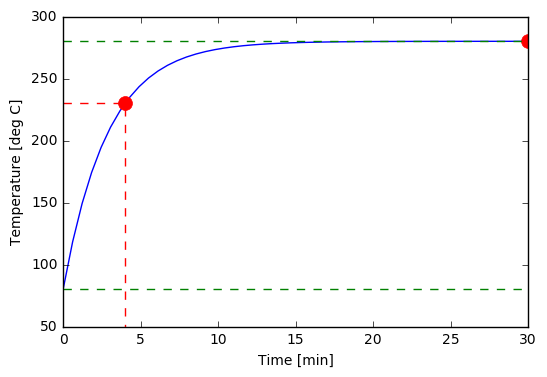

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

t = np.linspace(0,30)
P = 1.5

def Tderiv(x,t):
    return -x/tau + K*P/tau

sol = odeint(Tderiv, 80 -(-320), t)
plt.plot(t,sol-320)

plt.plot(4,230,'r.',ms=20)
plt.plot(30,280,'r.',ms=20)
plt.plot(plt.xlim(),[80,80],'g--')
plt.plot(plt.xlim(),[280,280],'g--')
plt.plot([plt.xlim()[0],4,4],[230,230,plt.ylim()[0]],'r--')

plt.xlabel('Time [min]')
plt.ylabel('Temperature [deg C]')

## 2. [5 pts] Second Order Process (Adapted from SEMD 5.14)

A device actuated by compressed air experiences a step change in air pressure from 15 to 31 psig. The response is shown in the following diagram.

![](SEMD Figure E5-14.png)

A model differential equation is written

$$\tau^2\frac{d^2R'}{dt^2} + 2\zeta\tau\frac{dR'}{dt} + R' = K u(t)$$

where $R'(t)$ represents the difference between $R(t)$ and the initial value of 8mm, and $u(t)$ is the diffence in air pressure from an initial steady state value of 15.

**a.** Use Figure 5.11 of your textbook (reproduced here) to estimate values for the time constant $\tau$, the damping coefficient $\zeta$, and process gain $K$.

![](SEMD Figure F5-11.png)

**b.** Using the results of part a, and the formulas 5-52 to 5-55, calculate values for time to first peak ($t_p$), overshoot (OS), decay ratio, and period of oscillation. How do they match the step response diagram?

### Solution

Write your answer in this and subsequent cells. This problem doesn't necessarily require Python coding, so feel free to simply edit and write your answer here if that meets your needs.

##### Part a. [3 pts]

For the solution of part a, we use the plot of the system response to determine the fraction overshoot and period.

In [4]:
# estimate overshoot from chart
overshoot = (12.7 - 11.2)/(11.2-8)
print('Overshoot = {0:.3f}'.format(overshoot))

# estimate period from chart
period = 2.3
print('Period = {0:.2f} seconds'.format(period))

Overshoot = 0.469
Period = 2.30 seconds


Next we use the Figure 5.11 to estimate the damping factor $\zeta$ and the time constant $\tau$.  The system gain $K$ is determined from the steady state response.

In [5]:
# steady state process gain
K = (11.2-8)/(31-15)

# estimate damping factor zeta and tau from chart
zeta = 0.2
tau = 0.97*period/(2*np.pi)

(K,tau,zeta)

(0.19999999999999996, 0.3550746780380185, 0.2)

##### Part b. [2 pts]

For an underdamped second order system, the desired performance metrics are given by the following by formulas in the following table.

| Quantity | Symbol | Expression/Value|
| :-: | :-: | :-: |
| Time to first peak | $t_p$ | $\frac{\pi\tau}{\sqrt{1-\zeta^2}}$ |
| Overshoot | OS | $\exp\left(-\frac{\pi\zeta}{\sqrt{1-\zeta^2}}\right)$ |
| Decay Ratio | DR | $\exp\left(-\frac{2\pi\zeta}{\sqrt{1-\zeta^2}}\right)$ |
| Period |  | $\frac{2\pi\tau}{\sqrt{1-\zeta^2}}$ |

In [6]:
tp = np.pi*tau/np.sqrt(1-zeta**2)
os = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
dr = os**2
pd = 2*np.pi*tau/np.sqrt(1-zeta**2)

print('Time to first peak = {0:.2f}'.format(tp))
print('Overshoot = {0:.2f}'.format(os))
print('Decay Ratio = {0:.2f}'.format(dr))
print('Period = {0:.2f}'.format(pd))

Time to first peak = 1.14
Overshoot = 0.53
Decay Ratio = 0.28
Period = 2.28


##### Further Calculations

The following calculations are not a required part of the problem solution.  

The standard model for a second order process is given by

$$\tau^2\frac{d^2R'}{dt^2} + 2\zeta\tau\frac{dR'}{dt} + R' = K u(t)$$

For simulation we'll define $S'$ as $\frac{dR'}{dt}$ which leaves a pair of first order differential equations

$$\begin{align*}
\frac{dR'}{dt} & = S' \\
\frac{dS'}{dt} & = -\frac{1}{\tau^2}R' - \frac{2\zeta}{\tau}S' + \frac{K}{\tau^2}u(t)
\end{align*}$$

The following interactive simulation allow

<function __main__.simulation>

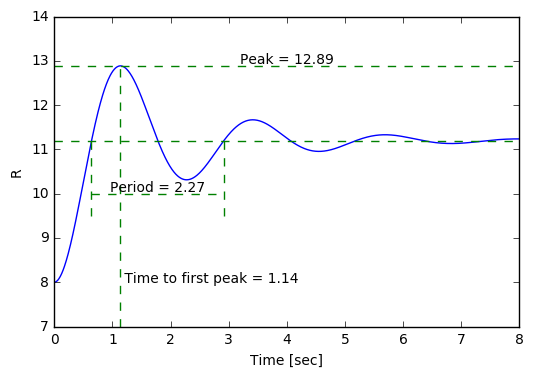

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

t = np.linspace(0,8,1000)
u = 31-15;

def simulation(zeta = zeta, tau = tau):

    def deriv(X,t):
        R,S = X
        Rdot = S
        Sdot = -R/tau/tau - 2*zeta*S/tau + K*u/tau/tau
        return[Rdot,Sdot]

    sol = odeint(deriv, [0,0], t)
    R = 8 + sol[:,0]
    plt.plot(t,R)

    plt.xlabel('Time [sec]')
    plt.ylabel('R')
    plt.ylim(7,14)

    plt.plot(plt.xlim(),[11.2,11.2],'g--')

    # plot peak 
    plt.plot(plt.xlim(),[R.max(),R.max()],'g--')
    plt.text(np.mean(plt.xlim()),R.max()+0.05,"Peak = {0:0.2f}".format(R.max()), ha='center')
    
    
    # plot time to first peak
    tp = t[np.where(R==R.max())[0][0]]
    plt.plot([tp,tp],[plt.ylim()[0],R.max()],'g--')
    plt.text(tp,8,' Time to first peak = {0:.2f}'.format(tp))

    # find positive-going zero crossings
    idx = np.where(np.diff(np.sign(R-11.2))>0)[0]
    t0 = t[idx[0]]
    t1 = t[idx[1]]
    plt.plot([t0,t0],[9.5,11.2],'g--')
    plt.plot([t1,t1],[9.5,11.2],'g--')
    plt.plot([t0,t1],[10,10],'g--')
    plt.text((t0+t1)/2,10.05,'Period = {0:.2f}'.format(t1-t0), ha='center')
    
interact(simulation,zeta=(0,1.2,0.001), tau = (0.1,0.5,0.001))

## 3. [10 pts] Modeling and Simulation of Interacting Tanks

The following diagram shows a pair of interacting tanks.

![](Problem 3.png)

Assume the pressure driven flow into and out of the tanks is linearly proportional to tank levels. The steady state flowrate through the tanks is 3 cubic ft per minute, the steady state heights are 7 and 3 feet, respectively, and a constant cross-sectional area 5 sq. ft. The equations are written as

$$\begin{align*}
\frac{dh_1}{dt} & = \frac{F_0}{A_1} - \frac{\beta_1}{A_1}\left(h_1-h_2\right) \\
\frac{dh_2}{dt} & = \frac{\beta_1}{A_2}\left(h_1-h_2\right) - \frac{\beta_2}{A_2}h_2
\end{align*}$$

**a.** Use the problem data to determine values for all constants in the model equations.

**b.** Construct a Phython simulation using `odeint`, and show a plot of the tank levels as function of time starting with an initial condition $h_1(0)=6$ and $h_2(0)$ = 5. Is this an overdamped or underdamped system.

### Solution

Write your answer in this and subsequent cells.

##### Part a. [2 pts]

The parameters that need to be determined are $\beta_1$ and $\beta_2$. At steady state all of the flows must be identical and

$$\begin{align*}
0 & = F_0 - \beta_1(h_1 - h_2) \\
0 & = \beta_1(h_1 - h_2) - \beta_2h_2 
\end{align*}$$

Substituting problem data,

$$\beta_1 = \frac{F_0}{h_1-h_2} = \frac{3\text{ cu.ft./min}}{4\text{ ft}} = 0.75\text{ sq.ft./min}$$ 

$$\beta_2 = \frac{\beta_1(h_1 - h_2)}{h_2} = \frac{3\text{ cu.ft./min}}{3\text{ ft}} = 1.0\text{ sq.ft./min}$$ 

##### Part b. [8 pts]

The next step is perform a simulation from a specified initial condition. 

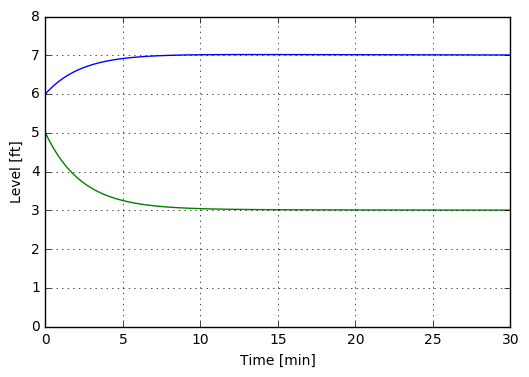

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

# simulation time grid
t = np.linspace(0,30,1000)

# initial condition
IC = [6,5]

# inlet flowrate
F0 = 3

# parameters for tank 1 
A1 = 5
beta1 = 0.75

# parameters for tank 2
A2 = 5
beta2 = 1.0

def hderiv(H,t):
    h1,h2 = H
    h1dot = (F0 - beta1*(h1-h2))/A1
    h2dot = (beta1*(h1-h2) - beta2*h2)/A2
    return [h1dot,h2dot]

sol = odeint(hderiv,IC,t)
plt.plot(t,sol)
plt.ylim(0,8)
plt.grid()
plt.xlabel('Time [min]')
plt.ylabel('Level [ft]')

##### Further Calculations

$$\frac{d}{dt}\left[\begin{array}{c} h_1 \\ h_2 \end{array}\right] = 
\left[\begin{array}{cc}-\frac{\beta_1}{A_1} & \frac{\beta_1}{A_1} \\
\frac{\beta_1}{A_2} & -\frac{\beta_1}{A_2} - \frac{\beta_2}{A_2} \end{array}\right]
\left[\begin{array}{c}h_1 \\ h_2\end{array}\right]
+
\left[\begin{array}{c}\frac{1}{A_1} \\ 0\end{array}\right]F_0$$